In [1]:
import pandas as pd 
import numpy as np 
from sklearn .model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
sheet=pd.read_csv('titanic.csv')
sheet.head(n=3)

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [3]:
sheet.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
sheet.head(n=2)

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1


In [4]:
sheet.columns[sheet.isna().any()]

Index(['Age'], dtype='object')

In [5]:
sheet['Age'].fillna(value=min)

0                         22.0
1                         38.0
2                         26.0
3                         35.0
4                         35.0
                ...           
886                       27.0
887                       19.0
888    <built-in function min>
889                       26.0
890                       32.0
Name: Age, Length: 891, dtype: object

In [6]:
x=sheet.drop(['Survived'],axis='columns')
y=sheet.Survived

In [7]:
dumins=pd.get_dummies(x.Gender)
x=pd.concat([x,dumins],axis='columns')
x.Age=x.Age.fillna(x.Age.mean())
x.drop(['Gender','male'],axis='columns',inplace=True)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [9]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)


SVM with linear 

In [10]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_hat=model.predict(x_test)
accuracy = accuracy_score(y_test,y_hat)*100
accuracy 

77.6536312849162

SVM with Rbf

In [11]:
from sklearn.svm import SVC
model_1=SVC(kernel='rbf')
model_1.fit(x_train,y_train)
y_hat=model_1.predict(x_test)
accuracy = accuracy_score(y_test,y_hat)*100
accuracy 

82.12290502793296

SVM with POIY

In [12]:
from sklearn.svm import SVC
model_2=SVC(kernel='poly')
model_2.fit(x_train,y_train)
y_hat=model_2.predict(x_test)
accuracy = accuracy_score(y_test,y_hat)*100
accuracy 

81.56424581005587

SVR with POLY

In [13]:
from sklearn.svm import SVR
model_9=SVR(kernel='poly')
model_9.fit(x_train,y_train)
y_hat=model_9.predict(x_test)
mse=mean_squared_error(y_test,y_hat)*100
mse

22.150262346236865

SVR With RBF

In [14]:
from sklearn.svm import SVR
model_7=SVR(kernel='rbf')
model_7.fit(x_train,y_train)
y_hat=model_7.predict(x_test)
mse=mean_squared_error(y_test,y_hat)*100
mse

14.759012946047589

SVR With Linear

In [15]:
from sklearn.svm import SVR
model_8=SVR(kernel='linear')
model_8.fit(x_train,y_train)
y_hat=model_8.predict(x_test)
mse=mean_squared_error(y_test,y_hat)*100
mse

19.107858312473326

Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_3= DecisionTreeClassifier(criterion='gini',max_depth=3)
model_3=model.fit(x_train,y_train)
y_hat=model_3.predict(x_test)
accuracy=accuracy_score(y_test,y_hat)*100
accuracy


77.6536312849162

<AxesSubplot:>

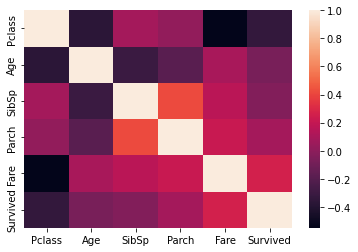

In [17]:
sns.heatmap(sheet.corr())

Decision Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
model_4= DecisionTreeRegressor(criterion='squared_error',max_depth=3)
model_4=model_4.fit(x_train,y_train)
y_hat=model_3.predict(x_test)
mse=mean_squared_error(y_test,y_hat)*100

print("mse=",mse)

mse= 22.3463687150838


KNeighbors Regression

In [19]:
from sklearn.neighbors import KNeighborsRegressor
model_5=KNeighborsRegressor(n_neighbors=80)
model_5.fit(x_train,y_train)
y_hat=model.predict(x_test)
y_hat
mse=mean_squared_error(y_test,y_hat)*100

print("mse=",mse)


mse= 22.3463687150838


KNeighborsClassifion

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_6=KNeighborsClassifier(n_neighbors=70)
model_6.fit(x_train,y_train)
y_hat=model_6.predict(x_test)
accuracy=accuracy_score(y_test,y_hat)*100
accuracy


78.77094972067039

GaussianNB

In [21]:
from sklearn.naive_bayes import GaussianNB
model_10=GaussianNB()
model_10.fit(x_train,y_train)
model_10.score(x_test,y_test)
y_hat=model_10.predict(x_test)
accuracy=accuracy_score(y_test,y_hat)*100
accuracy

78.2122905027933

LogisticRegression

In [22]:
from sklearn import linear_model
model_11=linear_model.LogisticRegression()
model_11.fit(x_train,y_train)
y_hat=model_11.predict(x_test)
accuracy=accuracy_score(y_test,y_hat)*100
accuracy

75.97765363128491